<a href="https://colab.research.google.com/github/KSY1526/SSUDA_LOTTEs/blob/main/LPOINT_BIG_COMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

품목별 소비자물가지수

https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1J20005&vw_cd=MT_ZTITLE&list_id=P2_6&scrId=&seqNo=&lang_mode=ko&obj_var_id=&itm_id=&conn_path=E1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

In [ ]:
path = "/content/drive/MyDrive/AIFactory/Data/LPOINT_BIG_COMP/LPOINT_BIG_COMP_PROCESSED_CUST/"

COPU = pd.read_csv(path + "LPOINT_BIG_COMP_COPU_CUST.csv")
LPAY = pd.read_csv(path + "LPOINT_BIG_COMP_LPAY_CUST.csv")
PDDE = pd.read_csv(path + "LPOINT_BIG_COMP_PDDE_CUST.csv")
ind = pd.read_csv(path + "품목별_소비자물가지수_품목성질별_2020100__20220713103547.csv", encoding = 'cp949')

In [ ]:
len((set(COPU.cust) | set(LPAY.cust) ) & set(PDDE.cust))

19627

In [ ]:
len((set(COPU.cust) | set(LPAY.cust)) .symmetric_difference(set(PDDE.cust)))

10247

In [ ]:
pd.DataFrame(ind.품목별.unique()).to_csv('지수.csv', index = False, encoding = 'ms949')

In [ ]:
pd.DataFrame(PDDE.pd_nm.unique()).to_csv("PDDE.csv", index = False, encoding = 'ms949')

In [ ]:
col = ['cust', 'ma_fem_dv', 'ages', 'zon_hlv', 'de_dt', 'de_hr', 'chnl_dv', 'br_zon_hlv', 'br_zon_mcls', 'cop_c','buy_am']

In [ ]:
COPU_PDDE = pd.concat([COPU[col], PDDE[col]])

In [ ]:
temp = COPU.groupby(['cust', 'de_dt', 'chnl_dv', 'cop_c']).sum('buy_am')

In [ ]:
temp = temp.reset_index()

In [ ]:
cnt = 0
b_temp = pd.DataFrame()
for i in tqdm(range(LPAY.shape[0])):
    cu = LPAY.loc[i, 'cust']
    date = LPAY.loc[i, 'de_dt']
    ho = LPAY.loc[i, 'de_hr']
    ch = LPAY.loc[i, 'chnl_dv']
    co = LPAY.loc[i, 'cop_c']
    buy = LPAY.loc[i, 'buy_am']
    a_temp = temp.loc[(temp.cust == cu) & (temp.de_dt == date) & (temp.de_hr == ho) & (temp.chnl_dv == ch) & (temp.buy_am == buy) & (temp.cop_c == co)]
    if a_temp.shape[0] > 0:
        F = b_temp.append(a_temp)

In [ ]:
b_temp.cust.unique()

array(['M205142844', 'M848083175', 'M253450307', 'M186539937',
       'M347475637', 'M617097623', 'M425728822', 'M314794317'],
      dtype=object)

In [ ]:
b_temp

,cust,de_dt,chnl_dv,cop_c,Unnamed: 0,de_hr,vst_dt,buy_am
45069,M205142844,20210420,1,D02,59273,16,20210420,11000
45080,M205142844,20210727,1,D02,59266,13,20210727,7600
182757,M848083175,20210309,1,D01,246003,12,20210309,10300
182764,M848083175,20210629,1,D02,245995,11,20210629,4900
182766,M848083175,20210801,1,D01,122065,14,20210801,20400
...,...,...,...,...,...,...,...,...
91505,M425728822,20210717,1,D02,243388,15,20210717,5600
91518,M425728822,20211028,1,D02,243386,15,20211028,4050
91526,M425728822,20211209,1,D02,243393,17,20211209,10500
91523,M425728822,20211205,1,D02,119554,19,20211205,4550


In [ ]:
(set(PDDE.cust) | set(COPU.cust)) & set(LPAY.cust)

In [ ]:
len(set(LPAY.cust))

8906

In [ ]:
len(set(COPU.cust))

21769

In [ ]:
len(set(PDDE.cust))

26917

In [ ]:
LPAY.rct_no

0         210803210311226
1         210803130167542
2         210803140275112
3         210803040637594
4         210803140675502
               ...       
353179    210125110644545
353180    210104210652271
353181    210119200278240
353182    210119180267206
353183    210119150154756
Name: rct_no, Length: 353184, dtype: int64

In [ ]:
# Python3 샘플 코드 #

import requests
api_key = 'Fag3S1Rzu7mBfk7C6iefQhLXPrSED3eWkntDDUS5dBwgMQCHmnFu7IBgcxoZh1weUelVZvjKkegTk40IigCehg%3D%3D'
# api_key_decode = requests.utils.unquote(api_key)

url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19InfStateJson'
params ={'serviceKey' : key, 'pageNo' : '1', 'numOfRows' : '10', 'startCreateDt' : '20200310', 'endCreateDt' : '20200315' }

response = requests.get(url, params=params)
print(response.content)

b'<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultCode>99</resultCode><resultMsg>SERVICE KEY IS NOT REGISTERED ERROR.</resultMsg></header></response>'


In [ ]:
response

<Response [200]>

In [ ]:
COPU['lpay'] = 0 
LPAY['lpay'] = 1 

In [ ]:
col = ['cust', 'ma_fem_dv', 'ages', 'zon_hlv', 'de_dt', 'de_hr', 'chnl_dv', 'cop_c', 'buy_am', 'lpay']

In [ ]:
# LPAY_COPU = pd.concat([LPAY[col], COPU[col]])
# LPAY_COPU['prop'] = 0

# for id in tqdm(LPAY_COPU.cust.unique()):
#     temp = LPAY_COPU.loc[LPAY_COPU.cust == id]
#     LPAY_COPU.loc[LPAY_COPU.cust == id, 'prop'] = temp.lpay.mean()
# LPAY_COPU.to_csv(path + "LPAY_COPU.csv", index = False) 
LPAY_COPU = pd.read_csv(path + "LPAY_COPU.csv")

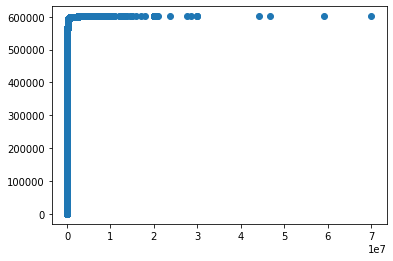

In [ ]:
plt.scatter(sorted(LPAY_COPU.buy_am), range(LPAY_COPU.shape[0]))

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)


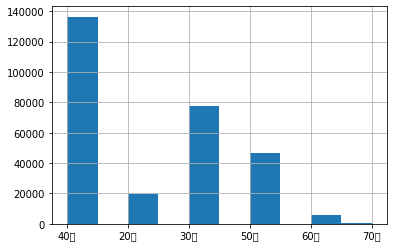

In [ ]:
LPAY_COPU.loc[LPAY_COPU.prop > 0.75, 'ages'].hist()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)


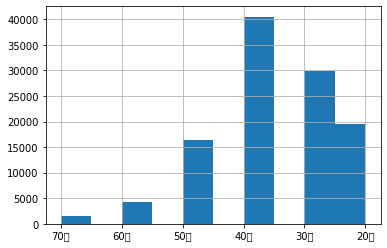

In [ ]:
LPAY_COPU.loc[LPAY_COPU.prop == 0, 'ages'].hist()

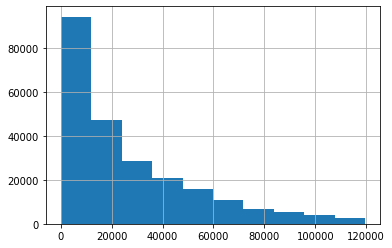

In [ ]:
#  구매내역 중 LPAY 사용 비율이 0.75 이상인 사람들의 lpay 사용금액의 분포
LPAY_COPU.loc[(LPAY_COPU.lpay == 1) & (LPAY_COPU.buy_am < LPAY_COPU.buy_am.quantile(0.95)) & (LPAY_COPU.prop > 0.75)  , 'buy_am'].hist()

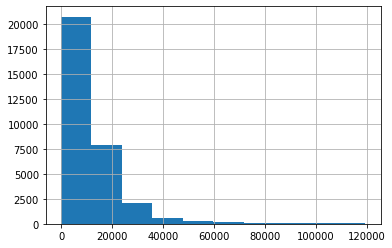

In [ ]:
#  구매내역 중 LPAY 사용 비율이 0.75 이상인 사람들의 현금거래 분포
LPAY_COPU.loc[(LPAY_COPU.lpay == 0) & (LPAY_COPU.buy_am < LPAY_COPU.buy_am.quantile(0.95)) & (LPAY_COPU.prop > 0.75)  , 'buy_am'].hist()

In [ ]:
LPAY_COPU.cust.unique()

array(['M629656521', 'M216016456', 'M205142844', ..., 'M736929241',
       'M040608978', 'M761634870'], dtype=object)

In [ ]:
PDDE

,Unnamed: 0,cust,ma_fem_dv,ages,zon_hlv,de_dt,de_hr,chnl_dv,br_zon_hlv,br_zon_mcls,cop_c,br_c,clac_hlv_nm,clac_mcls_nm,pd_nm,pd_c,buy_ct,buy_am
0,0,M430112881,여성,50대,Z17,20210101,10,1,Z10,Z10042,A01,A010039,남성의류,남성의류상의,남성티셔츠,PD0290,1,15000.0
1,1,M430112881,여성,50대,Z17,20210101,10,1,Z10,Z10042,A01,A010039,남성의류,남성의류상의,남성티셔츠,PD0290,1,19000.0
2,2,M430112881,여성,50대,Z17,20210101,10,1,Z10,Z10042,A01,A010039,남성의류,남성의류상의,남성티셔츠,PD0290,1,19000.0
3,3,M430112881,여성,50대,Z17,20210101,10,1,Z10,Z10042,A01,A010039,남성의류,남성의류상의,남성티셔츠,PD0290,1,19000.0
4,4,M430112881,여성,50대,Z17,20210101,10,1,Z10,Z10042,A01,A010039,테넌트/음식점,식당,커피/음료,PD1692,1,9900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381738,4381738,M498069014,여성,40대,Z14,20211227,16,2,NaN,NaN,A06,NaN,상품권,모바일상품권,백화점/마트모바일상품권,PD0507,1,100000.0
4381739,4381739,M498069014,여성,40대,Z14,20211227,16,2,NaN,NaN,A06,NaN,상품권,모바일상품권,백화점/마트모바일상품권,PD0507,1,100000.0
4381740,4381740,M498069014,여성,40대,Z14,20211227,16,2,NaN,NaN,A06,NaN,상품권,모바일상품권,백화점/마트모바일상품권,PD0507,1,100000.0
4381741,4381741,M498069014,여성,40대,Z14,20211227,16,2,NaN,NaN,A06,NaN,상품권,모바일상품권,백화점/마트모바일상품권,PD0507,1,100000.0


In [ ]:
# 대칭 차집합
len(set(LPAY_COPU.cust).symmetric_difference(set(PDDE.cust)))

10247

In [ ]:
len(PDDE.cust.unique())

26917

In [ ]:
print(len(LPAY.cust.unique()))
print(LPAY.shape[0])

8906
353184


In [ ]:
print(len(PDDE.cust.unique()))
print(PDDE.shape[0])

26917
4381743


In [ ]:
print(len(COPU.cust.unique()))
print(COPU.shape[0])

21769
248304


In [ ]:
COPU.loc[COPU.cust == 'M430112881']

,Unnamed: 0,cust,ma_fem_dv,ages,zon_hlv,de_dt,de_hr,chnl_dv,br_zon_hlv,br_zon_mcls,cop_c,br_c,vst_dt,buy_am
187860,187860,M430112881,여성,50대,Z17,20210509,14,1,Z17,Z17014,D01,D010565,20210509,13900


In [ ]:
						br_zon_hlv	br_zon_mcls		br_c	vst_dt	

In [ ]:
LPAY.loc[LPAY.cust == 'M430112881']

,Unnamed: 0,cust,ma_fem_dv,ages,zon_hlv,de_dt,de_hr,chnl_dv,cop_c,buy_am


In [ ]:
PDDE.loc[PDDE.cust == 'M430112881']

,Unnamed: 0,cust,ma_fem_dv,ages,zon_hlv,de_dt,de_hr,chnl_dv,br_zon_hlv,br_zon_mcls,cop_c,br_c,clac_hlv_nm,clac_mcls_nm,pd_nm,pd_c,buy_ct,buy_am
0,0,M430112881,여성,50대,Z17,20210101,10,1,Z10,Z10042,A01,A010039,남성의류,남성의류상의,남성티셔츠,PD0290,1,15000.0
1,1,M430112881,여성,50대,Z17,20210101,10,1,Z10,Z10042,A01,A010039,남성의류,남성의류상의,남성티셔츠,PD0290,1,19000.0
2,2,M430112881,여성,50대,Z17,20210101,10,1,Z10,Z10042,A01,A010039,남성의류,남성의류상의,남성티셔츠,PD0290,1,19000.0
3,3,M430112881,여성,50대,Z17,20210101,10,1,Z10,Z10042,A01,A010039,남성의류,남성의류상의,남성티셔츠,PD0290,1,19000.0
4,4,M430112881,여성,50대,Z17,20210101,10,1,Z10,Z10042,A01,A010039,테넌트/음식점,식당,커피/음료,PD1692,1,9900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3382795,3382795,M430112881,여성,50대,Z17,20211230,17,1,Z17,Z17014,A03,A030185,과자,스낵류,일반스낵,PD0232,1,2990.0
3382796,3382796,M430112881,여성,50대,Z17,20211230,17,1,Z17,Z17014,A03,A030185,유제품,우유,기능성우유,PD1157,1,2990.0
3382797,3382797,M430112881,여성,50대,Z17,20211115,11,1,Z17,Z17014,A04,A040303,생활/렌탈서비스,생활서비스,기타생활서비스,PD0529,1,100.0
3382798,3382798,M430112881,여성,50대,Z17,20211115,11,1,Z17,Z17014,A04,A040303,음료,즉석음료류,파우치/즉석음료,PD1178,1,1140.0


In [ ]:
LPAY.loc

In [ ]:
# 여기서 cop_c 는 숙박업종, 엔터테인먼트, F&B, 렌탈업종
print(COPU.shape)
print(COPU.isnull().sum())

(248304, 14)
Unnamed: 0      0
cust            0
ma_fem_dv       0
ages            0
zon_hlv         0
de_dt           0
de_hr           0
chnl_dv         0
br_zon_hlv     55
br_zon_mcls    55
cop_c           0
br_c           55
vst_dt          0
buy_am          0
dtype: int64


In [ ]:
print(COPU.loc[COPU.br_c.isnull(), 'chnl_dv'].value_counts())
print(COPU.loc[COPU.br_c.notnull(), 'chnl_dv'].value_counts())

2    55
Name: chnl_dv, dtype: int64
1    213525
2     34724
Name: chnl_dv, dtype: int64


In [ ]:
COPU.loc[COPU.br_c.isnull(),'cop_c'].value_counts()

E01    55
Name: cop_c, dtype: int64

In [ ]:
print(LPAY.shape)
print(LPAY.isnull().sum())

(353184, 10)
Unnamed: 0    0
cust          0
ma_fem_dv     0
ages          0
zon_hlv       0
de_dt         0
de_hr         0
chnl_dv       0
cop_c         0
buy_am        0
dtype: int64


In [ ]:
# 여기서 cop_c 는 유통사 (A1~6)
print(PDDE.shape)
print(PDDE.isnull().sum())

(4381743, 18)
Unnamed: 0           0
cust                 0
ma_fem_dv            0
ages                 0
zon_hlv              0
de_dt                0
de_hr                0
chnl_dv              0
br_zon_hlv      428501
br_zon_mcls     428501
cop_c                0
br_c            428501
clac_hlv_nm          0
clac_mcls_nm         0
pd_nm                0
pd_c                 0
buy_ct               0
buy_am               0
dtype: int64


In [ ]:
# 매장 점포, 행정구역이 Null 값인 경우 온라인 매장이라 없는 거다.

print(PDDE.loc[PDDE.br_c.notnull(), 'chnl_dv'].value_counts())
print(PDDE.loc[PDDE.br_c.isnull(), 'chnl_dv'].value_counts())

1    3953242
Name: chnl_dv, dtype: int64
2    428501
Name: chnl_dv, dtype: int64


In [ ]:
temp = PDDE.loc[PDDE.chnl_dv==2, 'buy_am']